In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse,rmse
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import rmse, aic

import warnings
warnings.filterwarnings("ignore")

In [ ]:
filepath='/content/drive/Shareddrives/팔당댐/combined_data/combined_train_test_filled_cleansed.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 전처리한 데이터 불러오기
df=pd.read_csv(filepath,index_col='ymdhm',parse_dates=['ymdhm'])
#df.drop(['Unnamed: 0'], axis =1, inplace =True)
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [ ]:
#log10(10)

In [ ]:
a = list(df.columns)

In [ ]:
a

['swl',
 'inf',
 'sfw',
 'ecpc',
 'tototf',
 'tide_level',
 'wl_1018662',
 'fw_1018662',
 'wl_1018680',
 'fw_1018680',
 'wl_1018683',
 'fw_1018683',
 'wl_1019630',
 'fw_1019630',
 'rf_10184100',
 'rf_10184110',
 'rf_10184140']

['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']

In [ ]:
b = ['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']

In [ ]:
a.remove('wl_1018662')

In [ ]:
a.remove('wl_1018680')

In [ ]:
a.remove('wl_1018683')

In [ ]:
a.remove('wl_1019630')

In [ ]:
a

['swl',
 'inf',
 'sfw',
 'ecpc',
 'tototf',
 'tide_level',
 'fw_1018662',
 'fw_1018680',
 'fw_1018683',
 'fw_1019630',
 'rf_10184100',
 'rf_10184110',
 'rf_10184140']

In [ ]:
len(a)

13

In [ ]:
log_values = []
for i in a:
    log = []
    for j in df[i]:
        try:
            x = log10(j)
            log.append(x)
        except:
            log.append(j)
    log_values.append(log)


In [ ]:
len(log_values)

13

In [ ]:
len(df.columns)

17

In [ ]:
len(df)

276336

In [ ]:
c = np.array(log_values)
c.shape

(13, 276336)

In [ ]:
c.T

array([[ 24.8  , 555.   , 219.07 , ...,   0.   ,   0.   ,   0.   ],
       [ 24.794, 464.6  , 218.86 , ...,   0.   ,   0.   ,   0.   ],
       [ 24.789, 478.1  , 218.69 , ...,   0.   ,   0.   ,   0.   ],
       ...,
       [ 25.04 , 259.37 , 212.86 , ...,   0.   ,   0.   ,   0.   ],
       [ 25.04 , 259.13 , 212.86 , ...,   0.   ,   0.   ,   0.   ],
       [ 25.04 , 258.16 , 212.86 , ...,   0.   ,   0.   ,   0.   ]])

In [ ]:
df_log = pd.DataFrame(c.T,index=df.index)
df_log.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
ymdhm,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0


In [ ]:
b_df = df.loc[:,b]

In [ ]:
b_df

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [ ]:
df_log = pd.concat([df_log,b_df],axis=1)
df_log

,0,1,2,3,4,5,6,7,8,9,10,11,12,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,319.84,0.0,-456.41,974.40,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,314.01,0.0,-717.30,1006.88,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,387.55,0.0,-843.37,1039.90,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [ ]:
a + b

['swl',
 'inf',
 'sfw',
 'ecpc',
 'tototf',
 'tide_level',
 'fw_1018662',
 'fw_1018680',
 'fw_1018683',
 'fw_1019630',
 'rf_10184100',
 'rf_10184110',
 'rf_10184140',
 'wl_1018662',
 'wl_1018680',
 'wl_1018683',
 'wl_1019630']

In [ ]:
df_log.columns = a+b
df_log.head()

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.0,219.07,24.93,555.0,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,24.794,464.6,218.86,25.15,562.9,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,24.789,478.1,218.69,25.31,576.4,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,24.789,464.8,218.69,25.31,563.1,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,24.789,478.1,218.69,25.31,576.4,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3


In [ ]:
df_2022=df_log.loc['2022']
df_2022

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,25.20,739.36,218.73,25.27,124.36,81.0,337.64,0.0,0.00,471.08,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,25.20,124.48,218.73,25.27,124.48,72.0,343.69,0.0,145.14,438.33,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,25.20,124.20,218.73,25.27,124.20,64.0,337.64,0.0,232.22,417.17,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,25.20,124.35,218.73,25.27,124.35,58.0,331.65,0.0,302.71,406.79,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,25.19,0.00,218.36,25.64,124.42,58.0,319.84,0.0,340.03,417.17,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,319.84,0.0,-456.41,974.40,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,314.01,0.0,-717.30,1006.88,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,387.55,0.0,-843.37,1039.90,0.0,0.0,0.0,299.0,307.0,309.0,310.0


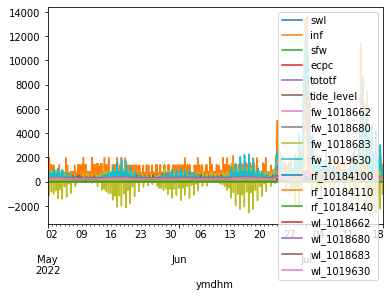

In [ ]:
df_2022.plot()

In [ ]:
# def adfuller_test(series, signif=0.05, name='', verbose=False):
#     """Perform ADFuller to test for Stationarity of given series and print report"""
#     r = adfuller(series, autolag='AIC')
#     output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
#     p_value = output['pvalue'] 
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Print Summary
#     print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
#     print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
#     print(f' Significance Level    = {signif}')
#     print(f' Test Statistic        = {output["test_statistic"]}')
#     print(f' No. Lags Chosen       = {output["n_lags"]}')

#     for key,val in r[4].items():
#         print(f' Critical value {adjust(key)} = {round(val, 3)}')

#     if p_value <= signif:
#         print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
#         print(f" => Series is Stationary.")
#     else:
#         print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
#         print(f" => Series is Non-Stationary.")

In [ ]:
# # df_2022 train 각 열에 ADF Test 
# for name, column in df_2022.loc[:'2022-05-31 23:50'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
df_2022_diff=df_2022.loc[:'2022-05-31 23:50'].diff().dropna()

In [ ]:
# # df_2022 train 각 열에 ADF Test 
# for name, column in df_2022_diff.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2021 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2021'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2020 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2020'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# df_2020_diff=df_log.loc['2020'].diff().dropna()

# # df 2020 전체 각 열에 ADF Test 
# for name, column in df_2020_diff.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2019 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2019'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2018 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2018'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2017 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2017'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2016 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2016'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2015 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2015'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2014 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2014'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2013 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2013'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
# # df 2012 전체 각 열에 ADF Test 
# for name, column in df_log.loc['2012'].iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [ ]:
df_log

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,319.84,0.0,-456.41,974.40,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,314.01,0.0,-717.30,1006.88,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,387.55,0.0,-843.37,1039.90,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [ ]:
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [ ]:
df_2022

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018680,fw_1018683,fw_1019630,rf_10184100,rf_10184110,rf_10184140,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,,,,
2022-05-01 00:00:00,25.20,739.36,218.73,25.27,124.36,81.0,337.64,0.0,0.00,471.08,0.0,0.0,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,25.20,124.48,218.73,25.27,124.48,72.0,343.69,0.0,145.14,438.33,0.0,0.0,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,25.20,124.20,218.73,25.27,124.20,64.0,337.64,0.0,232.22,417.17,0.0,0.0,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,25.20,124.35,218.73,25.27,124.35,58.0,331.65,0.0,302.71,406.79,0.0,0.0,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,25.19,0.00,218.36,25.64,124.42,58.0,319.84,0.0,340.03,417.17,0.0,0.0,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,319.84,0.0,-456.41,974.40,0.0,0.0,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,314.01,0.0,-717.30,1006.88,0.0,0.0,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,387.55,0.0,-843.37,1039.90,0.0,0.0,0.0,299.0,307.0,309.0,310.0


In [ ]:
df_2022 = df_log['2022']

In [ ]:
df_m=df_log.drop(['fw_1018680','rf_10184110','rf_10184140'],axis=1)

df_2022 = df_2022.drop(['fw_1018680','rf_10184110','rf_10184140'],axis=1)

#df_2020_diff=df_2020_diff.drop(['fw_1018680','rf_10184110','rf_10184140'],axis=1)

In [ ]:
# # order p 선택
# p = [10,20,30,40,50,60,70]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2022년 train 데이터로 확인
# aic_list=[]
# for i in p:
#   model = VAR(df_2022.iloc[:4464,:]) #4463 == 2022-05-31 23:50:00
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [15,16,17,18,19,20,21,22,23,24,25]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2022년 train 데이터로 확인
# aic_list=[]
# for i in p:
#   model = VAR(df_2022.iloc[:4464,:]) #4463 == 2022-05-31 23:50:00
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [10,20,30,40,50,60,70]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2021년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2021'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [25,26,27,28,29,30,31,32,33,34,35]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2021년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2021'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [30,40,50,60,70,80,90]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2020년 데이터로 확인
# for i in p:
#   model = VAR(df_2020_diff)
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [45,46,47,48,49,50,51,52,53,54,55]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2020년 데이터로 확인
# for i in p:
#   model = VAR(df_2020_diff)
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [20,30,40,50,60,70]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2019년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2019'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [25,26,27,28,29,30,31,32,33,34,35]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2019년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2019'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [20,30,40,50,60,70]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2018년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2018'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [35,36,37,38,39,40,41,42,43,44,45]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2018년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2018'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [20,30,40,50,60,70]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2017년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2017'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [35,36,37,38,39,40,41,42,43,44,45]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2017년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2017'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [20,30,40,50,60,70]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2016년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2016'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [35,36,37,38,39,40,41,42,43,44,45]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2016년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2016'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [20,30,40,50,60,70]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2015년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2015'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [35,36,37,38,39,40,41,42,43,44,45]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2015년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2015'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [20,30,40,50,60,70]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2014년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2014'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [35,36,37,38,39,40,41,42,43,44,45]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2014년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2014'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [20,30,40,50]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2013년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2013'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [35,36,37,38,39,40,41,42,43,44,45]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2013년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2013'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [20,30,40,50]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2012년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2012'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
# # order p 선택
# p = [35,36,37,38,39,40,41,42,43,44,45]  # 몇개 timestep 이전까지 모델에 반영할 것인지

# # 2012년 데이터로 확인
# for i in p:
#   model = VAR(df_m.loc['2012'])
#   results = model.fit(i)
#   aic_list.append(results.aic)
# idx=aic_list.index(min(aic_list))
# print(p[idx], min(aic_list))

In [ ]:
np.mean([16,26,46,26,36,36,36,36,36,36,36])

33.27272727272727

In [ ]:
df_2022.iloc[4464:11376,:] 

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,
2022-06-01 00:00:00,25.19,140.60,218.36,25.64,140.60,162.0,269.40,8.23,471.08,0.0,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,25.19,140.78,218.36,25.64,140.78,151.0,280.22,28.82,449.12,0.0,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,25.20,755.90,218.73,25.27,140.90,141.0,296.87,12.35,417.17,0.0,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,25.19,0.00,218.36,25.64,140.94,130.0,302.53,53.52,386.43,0.0,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,25.19,140.63,218.36,25.64,140.63,120.0,296.87,107.04,366.60,0.0,284.0,278.0,274.0,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,319.84,-456.41,974.40,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,314.01,-717.30,1006.88,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,387.55,-843.37,1039.90,0.0,299.0,307.0,309.0,310.0


In [ ]:
df_test=df_2022.loc['2022-06-01 00:00':,['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_forecast=pd.DataFrame(columns=df_2022.columns, index=df_test.index)

In [ ]:
df_test

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,284.0,278.0,274.0,259.0
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [ ]:
# # 모델 학습
# model = VAR(df_2022.iloc[:4464,:]) # 2022-05-31 23:50까지
# fitted = model.fit(33)

# # 시차 개수 
# lag = fitted.k_ar

# # 예측을 위한 마지막 p timestep만 추출 -> 시차(lag)
# forecast_input = df_2022.iloc[:4464,:].values[-lag:]

# fc=fitted.forecast(y=forecast_input, steps=1) # 바로 다음 step 1개 예측
# df_forecast.iloc[0]=fc
# df_forecast.head()

In [ ]:
df_2022

,swl,inf,sfw,ecpc,tototf,tide_level,fw_1018662,fw_1018683,fw_1019630,rf_10184100,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,,,,,,,,,,,
2022-05-01 00:00:00,25.20,739.36,218.73,25.27,124.36,81.0,337.64,0.00,471.08,0.0,290.7,284.2,279.0,269.3
2022-05-01 00:10:00,25.20,124.48,218.73,25.27,124.48,72.0,343.69,145.14,438.33,0.0,291.7,284.2,279.0,266.3
2022-05-01 00:20:00,25.20,124.20,218.73,25.27,124.20,64.0,337.64,232.22,417.17,0.0,290.7,284.2,279.0,264.3
2022-05-01 00:30:00,25.20,124.35,218.73,25.27,124.35,58.0,331.65,302.71,406.79,0.0,289.7,284.2,279.0,263.3
2022-05-01 00:40:00,25.19,0.00,218.36,25.64,124.42,58.0,319.84,340.03,417.17,0.0,287.7,284.2,279.0,264.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,319.84,-456.41,974.40,0.0,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,314.01,-717.30,1006.88,0.0,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,387.55,-843.37,1039.90,0.0,299.0,307.0,309.0,310.0


In [ ]:
from tqdm import tqdm

In [ ]:
# 전체 test 기간 VAR(34) 모델 학습 및 예측

for i in tqdm(range(6912)):
  model=VAR(df_2022.iloc[:4464+i,:]) 
  fitted = model.fit(29)
  lag = fitted.k_ar
  forecast_input = df_2022.iloc[:4464+i,:].values[-lag:]
  fc=fitted.forecast(y=forecast_input, steps=1) # 바로 다음 step 1개 예측
  df_forecast.iloc[i]=fc

100%|██████████| 6912/6912 [32:51<00:00,  3.51it/s]


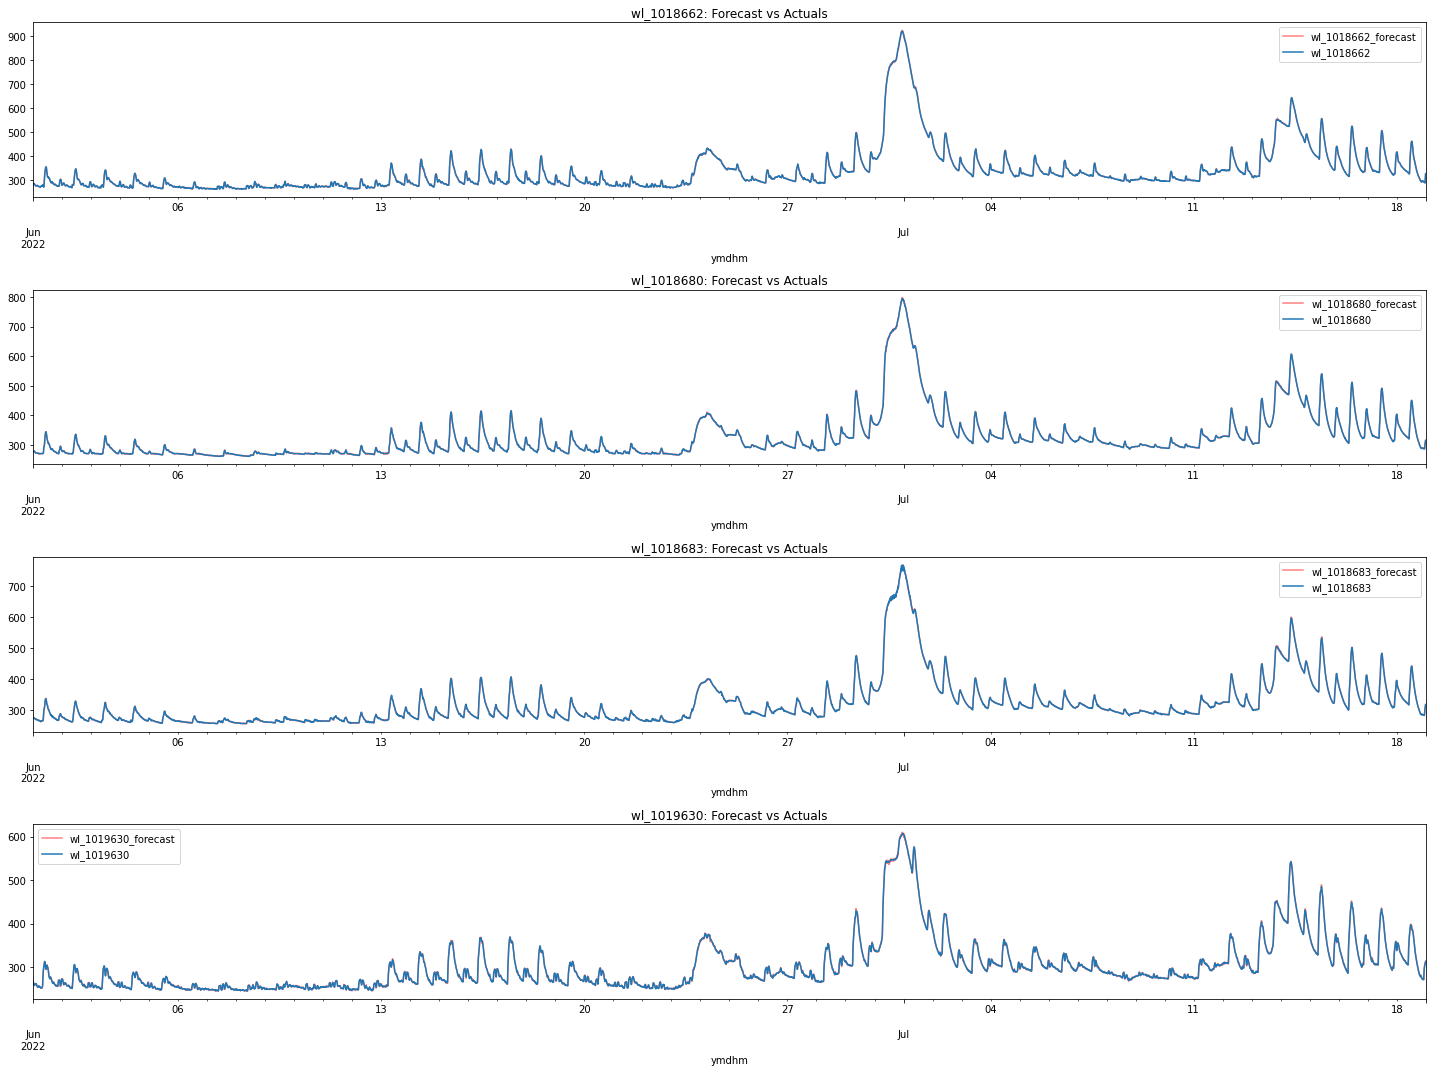

In [ ]:
# 시각화
df_forecast_y=df_forecast[['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
df_forecast_y.columns=['wl_1018662_forecast', 'wl_1018680_forecast', 'wl_1018683_forecast', 'wl_1019630_forecast']
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,15))

for col, ax in zip(['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630'], axes):
    df_forecast_y.plot(y=[col+'_forecast'], ax=ax, alpha=0.5, color='r', legend=True).autoscale(axis='x',tight=True)
    df_test[col].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
plt.tight_layout()
plt.show()

In [ ]:
submission=df_forecast[['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
submission.reset_index(drop=False, inplace=True)
submission['ymdhm']=submission['ymdhm'].dt.strftime('%Y-%m-%d %H:%M')
submission.set_index('ymdhm', inplace=True)

In [ ]:
submission

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,280.233657,277.466922,274.800335,268.849852
2022-06-01 00:10,281.614246,276.477016,273.891573,267.410803
2022-06-01 00:20,282.718665,276.884526,273.765804,264.736943
2022-06-01 00:30,285.332732,277.780969,273.22181,260.944368
2022-06-01 00:40,285.54054,278.319444,273.193962,258.937009
...,...,...,...,...
2022-07-18 23:10,287.718524,293.098523,298.73735,306.277926
2022-07-18 23:20,289.249516,302.544207,304.431146,308.683938
2022-07-18 23:30,294.63837,307.50132,307.506422,309.682155


In [ ]:
# 정답데이터랑 비교
filename = '/content/drive/Shareddrives/팔당댐/combined_data/combined_train_test_filled.csv'
dff = pd.read_csv(filename, index_col='ymdhm', parse_dates=['ymdhm'])
dff.tail()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,NaN,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,NaN,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,NaN,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0
2022-07-18 23:40:00,25.04,259.13,212.86,31.14,259.13,458.0,309.0,454.91,311.0,NaN,314.0,-1023.37,312.0,1073.46,0.0,0.0,0.0
2022-07-18 23:50:00,25.04,258.16,212.86,31.14,258.16,442.0,326.0,582.21,314.0,NaN,317.0,-1049.44,313.0,1090.45,0.0,0.0,0.0


In [ ]:
# 정답데이터
dff1 = dff.loc['2022-06-01': , ['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
dff1

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,284.0,278.0,274.0,259.0
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [ ]:
# 예측데이터
pred_np = submission.values
pred_np

array([[280.2336568791866, 277.4669220931072, 274.80033472576963,
        268.8498521260842],
       [281.61424564908293, 276.47701586179323, 273.8915732198892,
        267.41080286604006],
       [282.7186648651416, 276.88452556118557, 273.76580429236174,
        264.73694270580586],
       ...,
       [294.6383704070257, 307.50132027399604, 307.5064215496014,
        309.6821546602139],
       [310.6121533638985, 311.1104116158326, 312.6210137195368,
        311.282864678278],
       [322.3471303920901, 315.8591486431985, 316.9538385609124,
        313.40028039015453]], dtype=object)

In [ ]:
# 정답데이터
dff1_np = dff1.values
dff1_np

array([[279., 276., 274., 269.],
       [281., 277., 274., 267.],
       [284., 277., 274., 264.],
       ...,
       [299., 307., 309., 310.],
       [309., 311., 314., 312.],
       [326., 314., 317., 313.]])

In [ ]:
# 두 개 값 빼고 제곱
(pred_np - dff1_np)**2

array([[1.5219092955643794, 2.1518604272460102, 0.6405356732727496,
        0.022544384041430367],
       [0.37729771741731216, 0.27351240881587385, 0.01175636664519358,
        0.16875899474672565],
       [1.6418197278226176, 0.013334346019507738, 0.05484762947618729,
        0.543084551640461],
       ...,
       [19.023812706309, 0.251322017119468, 2.23077658749513,
        0.10102566002375256],
       [2.599038468729341, 0.012190724910769583, 1.9016031617057572,
        0.5142830696613534],
       [13.343456372391874, 3.4564336775069093, 0.002130878458638016,
        0.16022439074226666]], dtype=object)

In [ ]:
# 다 더하고 전체개수로 나누고 루트!!
import numpy as np
import math
math.sqrt(np.sum((pred_np - dff1_np)**2) / 27648)

1.2346923692734404

In [ ]:
submission.to_csv('/content/drive/Shareddrives/팔당댐/제출/VAR_log12.csv')